### **Load Library**

In [ ]:
from google.colab import drive

# Mount Google-Drive Directory
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import kagglehub
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from google.colab import userdata
from matplotlib import pyplot as plt

In [ ]:
FOLDER_PATH = "/content/gdrive/MyDrive/AI Models/SupervisedLearning/regression-crop-yield"
%cd $FOLDER_PATH

/content/gdrive/MyDrive/AI Models/SupervisedLearning/regression-crop-yield


### **Load Dataset**

In [ ]:
# Load data from kaggle
def pandas_df(path: str, file_name: str) -> pd.DataFrame:

    path = os.path.join(path, f"{file_name}")

    return pd.read_csv(path)


In [ ]:
# https://www.kaggle.com/datasets/samuelotiattakorah/agriculture-crop-yield

PATH = kagglehub.dataset_download("samuelotiattakorah/agriculture-crop-yield")
df = pandas_df(PATH, 'crop_yield.csv')
df.columns = [c.lower() for c in df.columns]
df.head()

,region,soil_type,crop,rainfall_mm,temperature_celsius,fertilizer_used,irrigation_used,weather_condition,days_to_harvest,yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


### **Data Overview**

In [ ]:
# Column Names
print(df.columns)

Index(['region', 'soil_type', 'crop', 'rainfall_mm', 'temperature_celsius',
       'fertilizer_used', 'irrigation_used', 'weather_condition',
       'days_to_harvest', 'yield_tons_per_hectare'],
      dtype='object')


In [ ]:
# Data dimension
print("Dimension: ", df.shape)

Dimension:  (1000000, 10)


In [ ]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   region                  1000000 non-null  object 
 1   soil_type               1000000 non-null  object 
 2   crop                    1000000 non-null  object 
 3   rainfall_mm             1000000 non-null  float64
 4   temperature_celsius     1000000 non-null  float64
 5   fertilizer_used         1000000 non-null  bool   
 6   irrigation_used         1000000 non-null  bool   
 7   weather_condition       1000000 non-null  object 
 8   days_to_harvest         1000000 non-null  int64  
 9   yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [ ]:
# Missing and Duplicates
print("\nNumber of missing values")
print("-"*30)
print(df.isna().sum())

print("\nNumber of duplicated values")
print("-"*30)
print(df.duplicated().sum())


Number of missing values
------------------------------
region                    0
soil_type                 0
crop                      0
rainfall_mm               0
temperature_celsius       0
fertilizer_used           0
irrigation_used           0
weather_condition         0
days_to_harvest           0
yield_tons_per_hectare    0
dtype: int64

Number of duplicated values
------------------------------
0


In [ ]:
# Data Summary: Numerical
print("*"*60)
print("Numerical Summary:".upper())
print(df.describe(include="number"))

# String/Objects
print("*"*60)
print("\nString Summary:".upper())
print(df.describe(include="object"))

# Boolean
print("*"*60)
print("\nBoolean Summary:".upper())
print(df.describe(include="boolean"))

************************************************************
NUMERICAL SUMMARY:
          rainfall_mm  temperature_celsius  days_to_harvest  \
count  1000000.000000       1000000.000000   1000000.000000   
mean       549.981901            27.504965       104.495025   
std        259.851320             7.220608        25.953412   
min        100.000896            15.000034        60.000000   
25%        324.891090            21.254502        82.000000   
50%        550.124061            27.507365       104.000000   
75%        774.738520            33.753267       127.000000   
max        999.998098            39.999997       149.000000   

       yield_tons_per_hectare  
count          1000000.000000  
mean                 4.649472  
std                  1.696572  
min                 -1.147613  
25%                  3.417637  
50%                  4.651808  
75%                  5.879200  
max                  9.963372  
************************************************************

ST

### **Data processing & cleaning**

In [ ]:
# Copy Dataframe
dataframe = df.copy()

In [ ]:
# Renaming columns
dataframe.rename(columns={"yield_tons_per_hectare": "crop_yield"}, inplace=True)

In [ ]:
# Change feature values to lowercase (Only categorical values)
for c in dataframe.select_dtypes('object').columns:
    dataframe[c] = dataframe[c].str.lower()

# dataframe.head()

In [ ]:
# Feature Engineering
dataframe['yield_success'] = dataframe["crop_yield"].apply(lambda x: "yes" if x > 0 else "no")

bool_columns = dataframe.select_dtypes("boolean").columns
for c in bool_columns:
    dataframe[c] = dataframe[c].apply(lambda s: "yes" if s else "no")

In [ ]:
add_cols = ["yield_success", "crop_yield"]
column_names = dataframe.columns.tolist()

sorted_columns = [c for c in column_names if c not in add_cols] + add_cols

dataframe = dataframe[sorted_columns]
dataframe.head()

,region,soil_type,crop,rainfall_mm,temperature_celsius,fertilizer_used,irrigation_used,weather_condition,days_to_harvest,yield_success,crop_yield
0,west,sandy,cotton,897.077239,27.676966,no,yes,cloudy,122,yes,6.555816
1,south,clay,rice,992.673282,18.026142,yes,yes,rainy,140,yes,8.527341
2,north,loam,barley,147.998025,29.794042,no,no,sunny,106,yes,1.127443
3,north,sandy,soybean,986.866331,16.644190,no,yes,rainy,146,yes,6.517573
4,south,silt,wheat,730.379174,31.620687,yes,yes,cloudy,110,yes,7.248251


### **Data Analysis & Exploration**

In [ ]:
# Plot Data Distribution (Histogram)
def plot_histogram(df: pd.DataFrame, x_label: str, plot_title: str, color="blue", bins=20):
    plt.subplots(1,1, figsize=(12, 4))
    plt.style.use("ggplot")

    sns.histplot(df[x_label], bins=bins, color=color)

    plt.xlabel(x_label.capitalize())
    plt.ylabel("Freq")
    plt.title(plot_title, fontdict={"fontsize": 12, "fontweight": "light"})
    plt.tight_layout()
    plt.show()

# Plot Bargraph for data frequncy or count
def plot_bargraph(df: pd.DataFrame, x_label: str, plot_title: str, color="blue", gap=0.5):
    plt.subplots(1, 1, figsize=(12, 4))
    plt.style.use("ggplot")

    sns.countplot(df, x=x_label, color=color, gap=gap,  palette="tab10", hue=x_label)

    plt.xlabel(x_label.capitalize(), fontdict={"fontsize": 10})
    plt.ylabel("Count", fontdict={"fontsize": 10})
    plt.ylim(bottom=-4)
    plt.title(plot_title, fontdict={"fontsize": 11, "fontweight": "light"})
    plt.tight_layout()
    plt.show()

# Plot target against features
def plot_target_against_feature(df: pd.DataFrame, feature: str, target: str, plot_title: str, color="red"):

    plt.subplots(1, 1, figsize=(12, 4))
    plt.style.use("ggplot")

    sns.scatterplot(x=df[feature], y=df[target])

    plt.title(plot_title, fontdict={"fontsize": 12, "fontweight": "light"})
    plt.xlabel(feature.capitalize())
    plt.ylabel(target.capitalize())

    plt.tight_layout()
    plt.show()

# Plot Categorical Features against Crop yield
def plot_crop_yield_categorical(df: pd.DataFrame, feature: str, target: str, plot_title: str):
    plt.subplots(1, 1, figsize=(12, 3))
    plt.style.use("ggplot")

    sns.barplot(x=df[feature], y=df[target], gap=0.6, palette="tab10", hue=df[target])

    plt.title(plot_title, fontdict={"fontsize": 12, "fontweight": "light"})
    plt.xlabel(feature.capitalize())
    plt.ylabel(target.capitalize())

    plt.tight_layout()
    plt.show()

#### **Univariate Analysis**

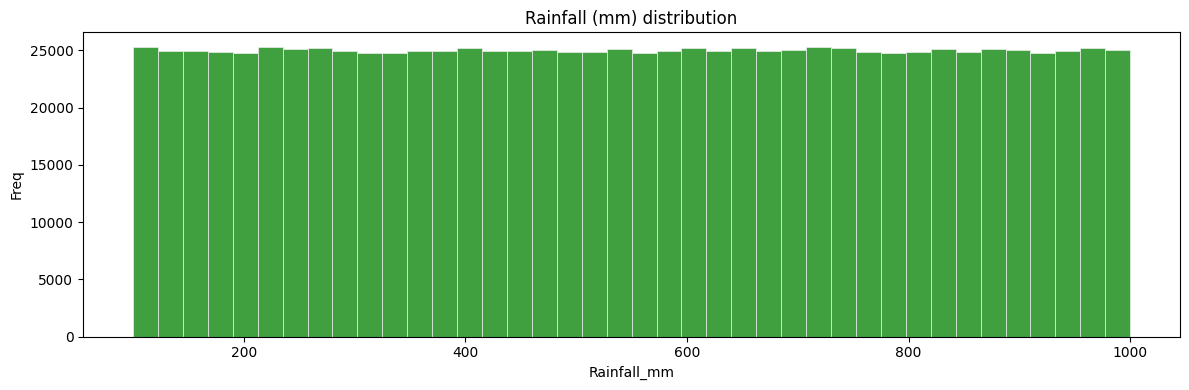

In [ ]:
# RainFall Distribution
bins = 40
color = "green"
x_label = "rainfall_mm"
plot_title = "Rainfall (mm) distribution"
plot_histogram(dataframe, x_label, plot_title, color, bins)

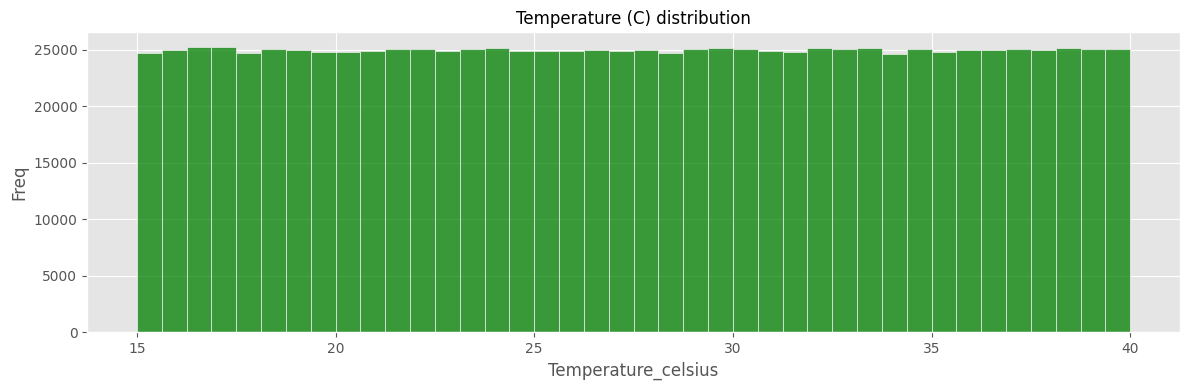

In [ ]:
# Temperature (celsius) Distribution
bins = 40
color = "green"
x_label = "temperature_celsius"
plot_title = "Temperature (C) distribution"
plot_histogram(dataframe, x_label, plot_title, color, bins)

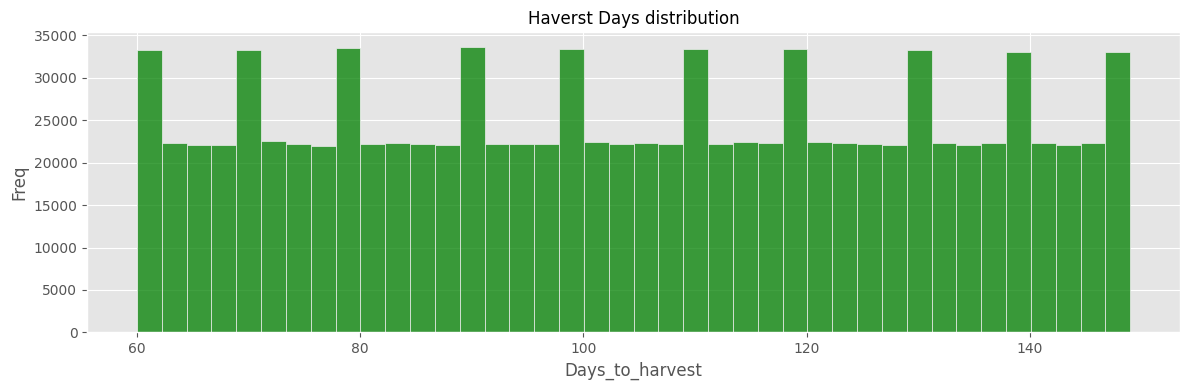

In [ ]:
# Harvest Days Distribution
bins = 40
color = "green"
x_label = "days_to_harvest"
plot_title = "Haverst Days distribution"
plot_histogram(dataframe, x_label, plot_title, color, bins)

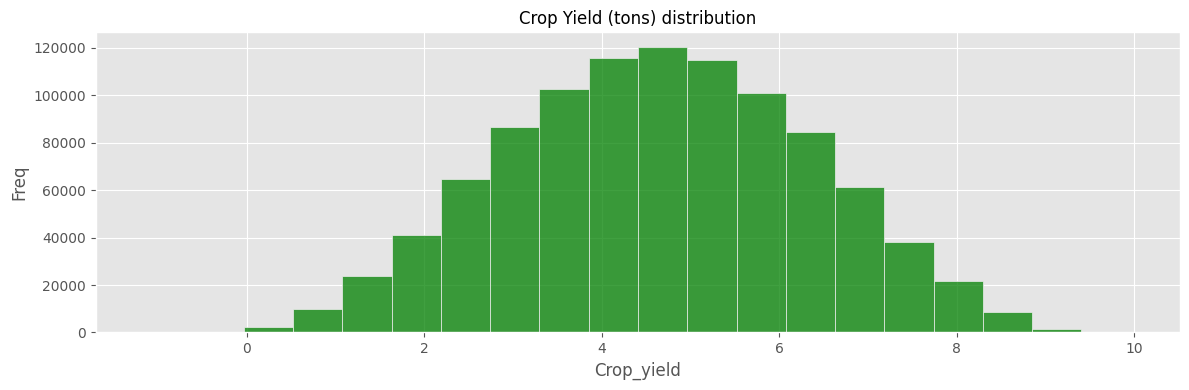

In [ ]:
# Crop Yield Distribution
bins = 20
color = "green"
x_label = "crop_yield"
plot_title = "Crop Yield (tons) distribution"
plot_histogram(dataframe, x_label, plot_title, color, bins)

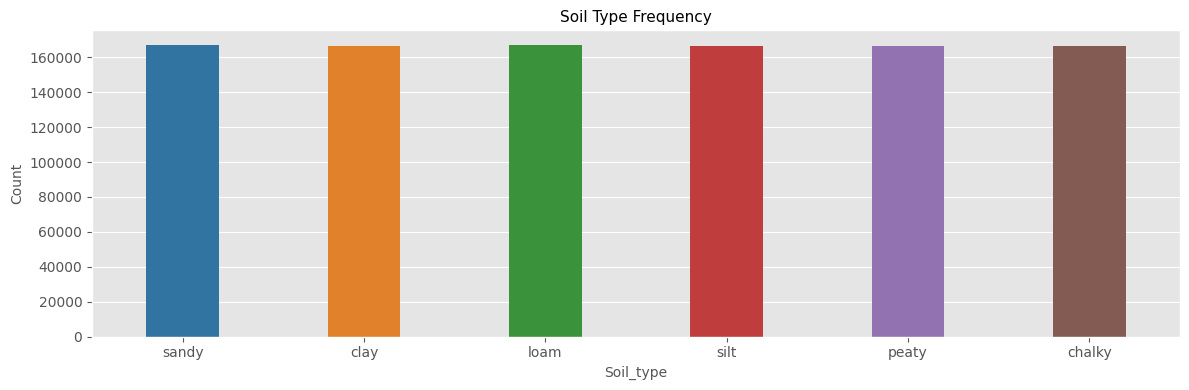

In [ ]:
# Soil Type Frequency/Count
x_label = "soil_type"
plot_title = "Soil Type Frequency"
plot_bargraph(dataframe, x_label, plot_title)

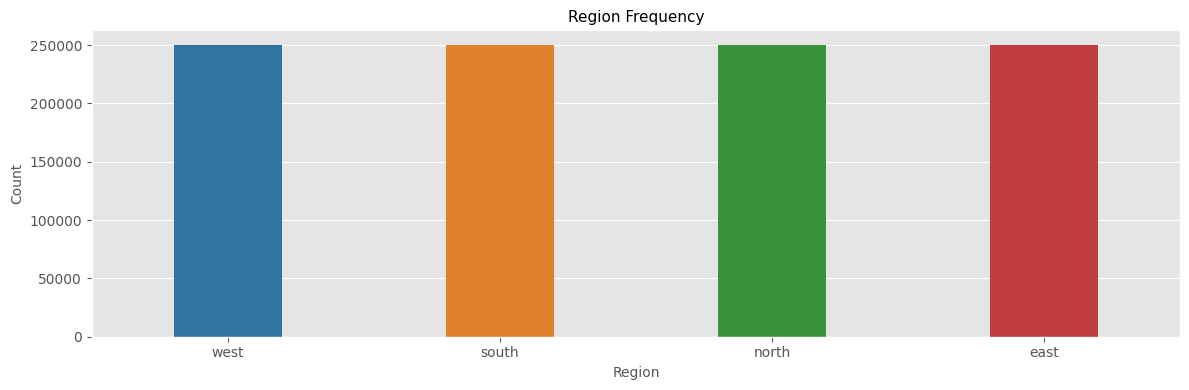

In [ ]:
# Region Frequency/Count
x_label = "region"
plot_title = f"{x_label.capitalize()} Frequency"
plot_bargraph(dataframe, x_label, plot_title)

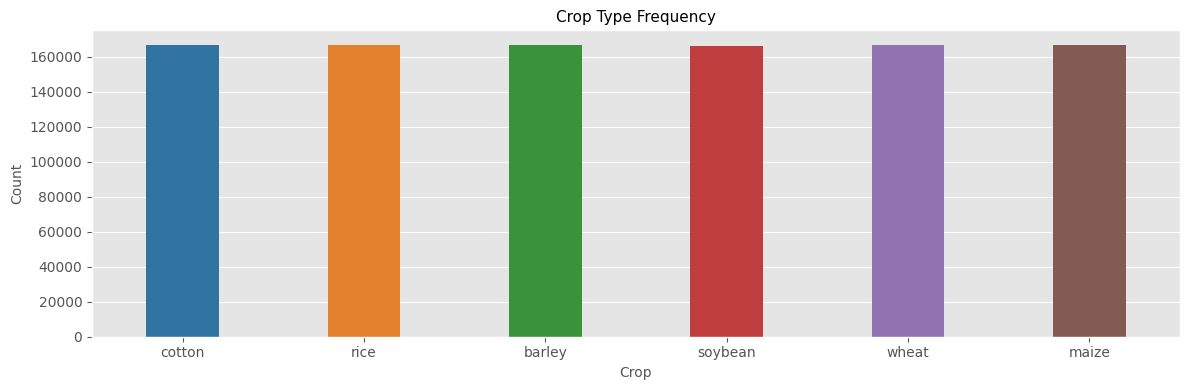

In [ ]:
# Crop Type Frequency/Count
x_label = "crop"
plot_title = f"{x_label.capitalize()} Type Frequency"
plot_bargraph(dataframe, x_label, plot_title)

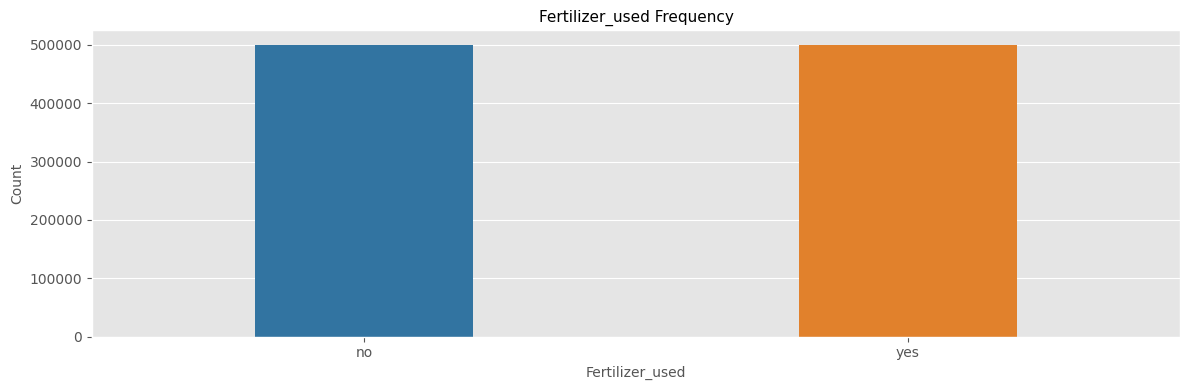

In [ ]:
# Fertilizer Frequency/Count
x_label = "fertilizer_used"
plot_title = f"{x_label.capitalize()} Frequency"
plot_bargraph(dataframe, x_label, plot_title)

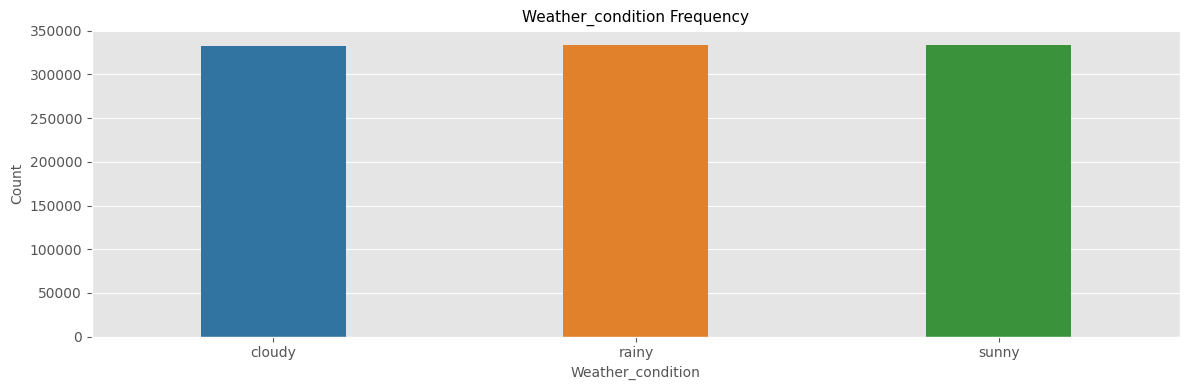

In [ ]:
# Weather_condition Frequency/Count
x_label = "weather_condition"
plot_title = f"{x_label.capitalize()} Frequency"
plot_bargraph(dataframe, x_label, plot_title)

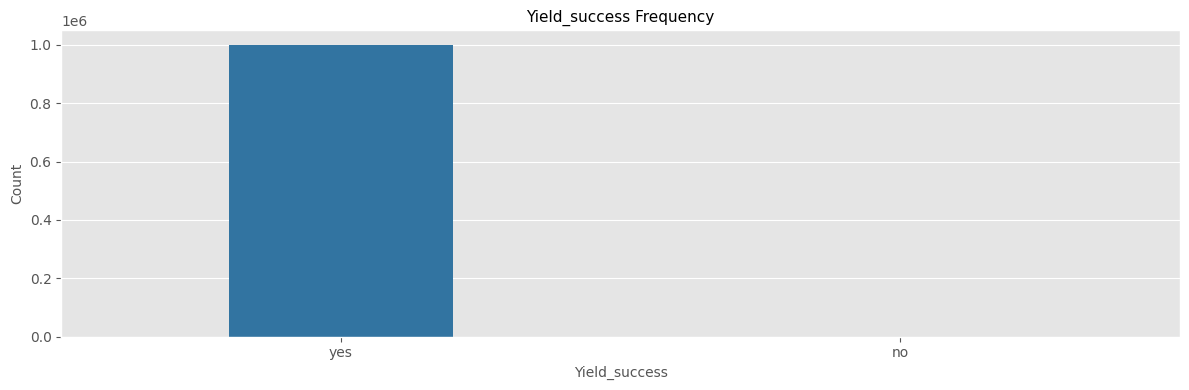

In [ ]:
# yield_success Frequency/Count
x_label = "yield_success"
plot_title = f"{x_label.capitalize()} Frequency"
plot_bargraph(dataframe, x_label, plot_title)

#### **Multiple Analysis**

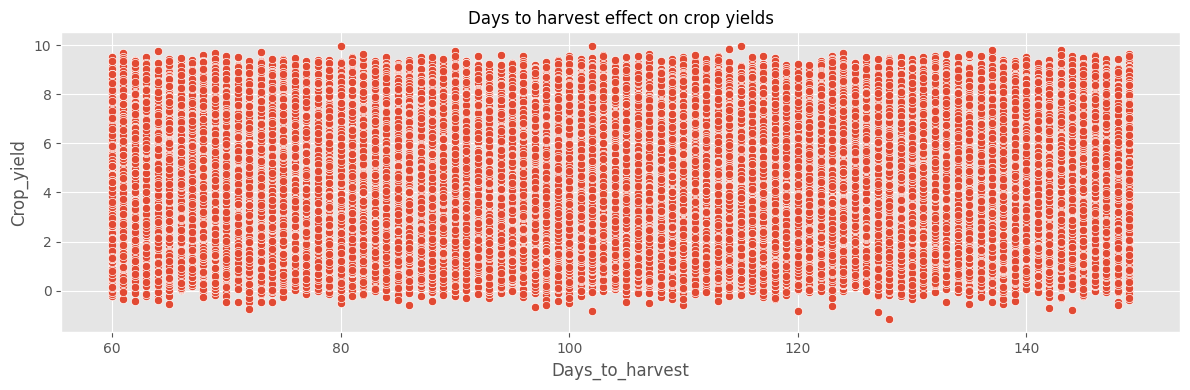

In [ ]:
# Crop Yield Vs. Days To Haverst
color = "green"
x_label = "days_to_harvest"
y_label = "crop_yield"
plot_title = "Days to harvest effect on crop yields"

plot_target_against_feature(dataframe, x_label, y_label, plot_title, color)

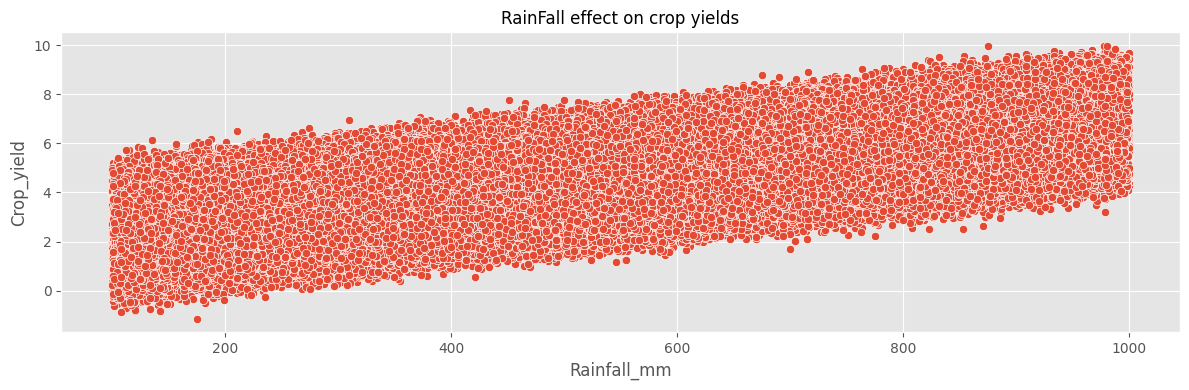

In [ ]:
# Crop yield Vs. RainFall (mm)
x_label = "rainfall_mm"
y_label = "crop_yield"
plot_title = "RainFall effect on crop yields"

plot_target_against_feature(dataframe, x_label, y_label, plot_title)

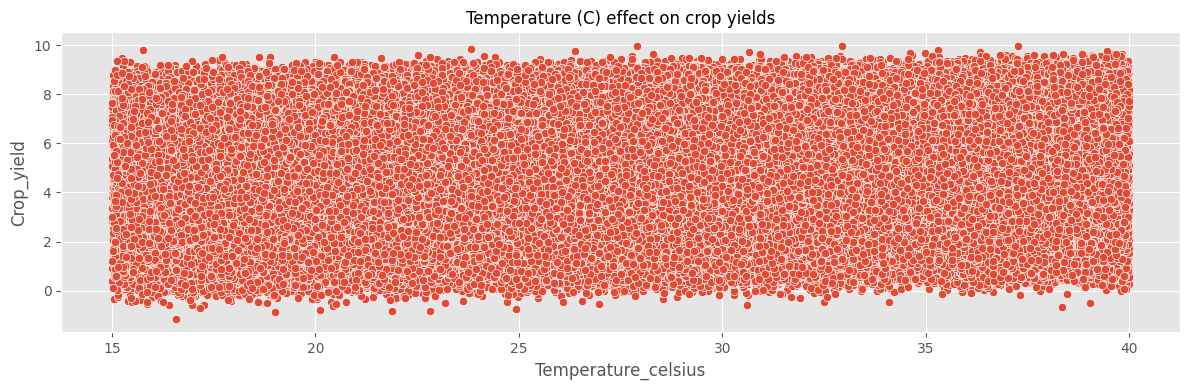

In [ ]:
# Crop yield Vs. temperature (C)
x_label = "temperature_celsius"
y_label = "crop_yield"
plot_title = "Temperature (C) effect on crop yields"

plot_target_against_feature(dataframe, x_label, y_label, plot_title)

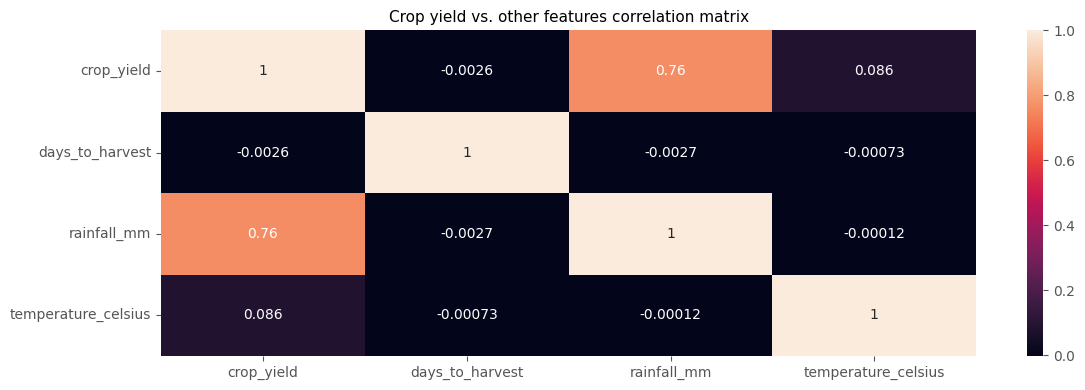

In [ ]:
# Visualizing how correlated are numerical features against crop yields
check_columns_corr = ["crop_yield", "days_to_harvest", "rainfall_mm", "temperature_celsius"]
corr = dataframe[check_columns_corr].corr()

## Correlation Analysis
plt.subplots(1,1, figsize=(12, 4))
plt.style.use("ggplot")

sns.heatmap(corr, annot=True)
plt.title("Crop yield vs. other features correlation matrix", fontsize=11)

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

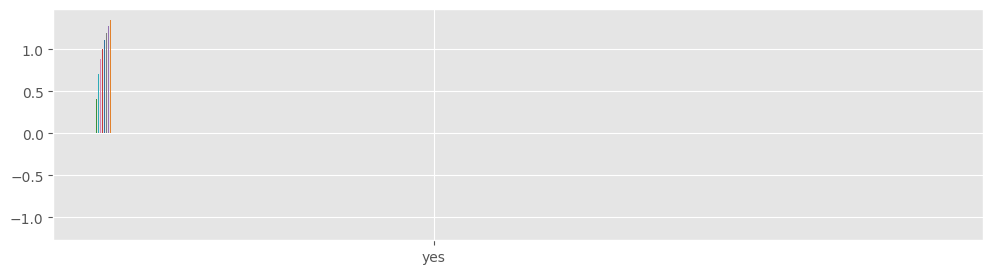

In [ ]:
# Crop yield Vs. yield success
x_label = "yield_success"
y_label = "crop_yield"
plot_title = "Crop Yield by Success"

plot_crop_yield_categorical(dataframe, x_label, y_label, plot_title)

In [ ]:
# Crop yield Vs. region
x_label = "region"
y_label = "crop_yield"
plot_title = "Crop Yield by region"

plot_crop_yield_categorical(dataframe, x_label, y_label, plot_title)

In [ ]:
# Crop yield Vs. soil_type
x_label = "soil_type"
y_label = "crop_yield"
plot_title = "Crop Yield by Soil Type"

plot_crop_yield_categorical(dataframe, x_label, y_label, plot_title)

In [ ]:
# Crop yield Vs. Crop Type
x_label = "crop"
y_label = "crop_yield"
plot_title = "Crop Yield by Crop Type"

plot_crop_yield_categorical(dataframe, x_label, y_label, plot_title)

In [ ]:
# Crop yield Vs. Fertilizer
x_label = "fertilizer_used"
y_label = "crop_yield"
plot_title = "Crop Yield by Fertilizer Used"

plot_crop_yield_categorical(dataframe, x_label, y_label, plot_title)

In [ ]:
# Crop yield Vs. Fertilizer
x_label = "irrigation_used"
y_label = "crop_yield"
plot_title = "Crop Yield by Irrigation Used"

plot_crop_yield_categorical(dataframe, x_label, y_label, plot_title)

In [ ]:
# Crop yield Vs. Weather Condition
x_label = "weather_condition"
y_label = "crop_yield"
plot_title = "Crop Yield by Weather Condition"

plot_crop_yield_categorical(dataframe, x_label, y_label, plot_title)

#### Model Development

In [ ]:
from sklearn.model_selection import train_test_split

feature_data_pd = df.copy()
print(f"We have {feature_data_pd.shape[0]} records in our source dataset")

# split target variable into it's own dataset
target_col = "crop_yield"
X_all = feature_data_pd.drop(labels=target_col, axis=1)
y_all = feature_data_pd[target_col]

# test / train split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=0.8, random_state=42)
print(f"We have {X_train.shape[0]} records in our training dataset")
print(f"We have {X_test.shape[0]} records in our test dataset")

We have 1000000 records in our source dataset
We have 800000 records in our training dataset
We have 200000 records in our test dataset


In [ ]:
from math import sqrt
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

# Apply the Standard Scaler to all our numerical features
columns_scaler = ["rainfall_mm", "temperature_celsius", "days_to_harvest"]
columns_encoder = list(set(X_train.columns) - set(columns_scaler))

std_ct = make_column_transformer(
    (StandardScaler(), columns_scaler), remainder="passthrough"
)

In [ ]:
# pipeline to transform inputs and then pass results to the linear regression model
lr_pl = Pipeline(steps=[
  ("tx_inputs", std_ct),
  ("lr", LinearRegression() )
])

# fit our model
lr_mdl = lr_pl.fit(X_train, y_train)

In [ ]:
# evaluate the test set
predicted = lr_mdl.predict(X_test)
test_r2 = r2_score(y_test, predicted)
test_mse = mean_squared_error(y_test, predicted)
test_rmse = sqrt(test_mse)
test_mape = mean_absolute_percentage_error(y_test, predicted)

print("Test evaluation summary:")
print(f"R^2: {test_r2}")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"MAPE: {test_mape}")

Test evaluation summary:
R^2: 0.9131697029900037
MSE: 0.25032712469652163
RMSE: 0.5003270177559089
MAPE: 0.1208340860285384


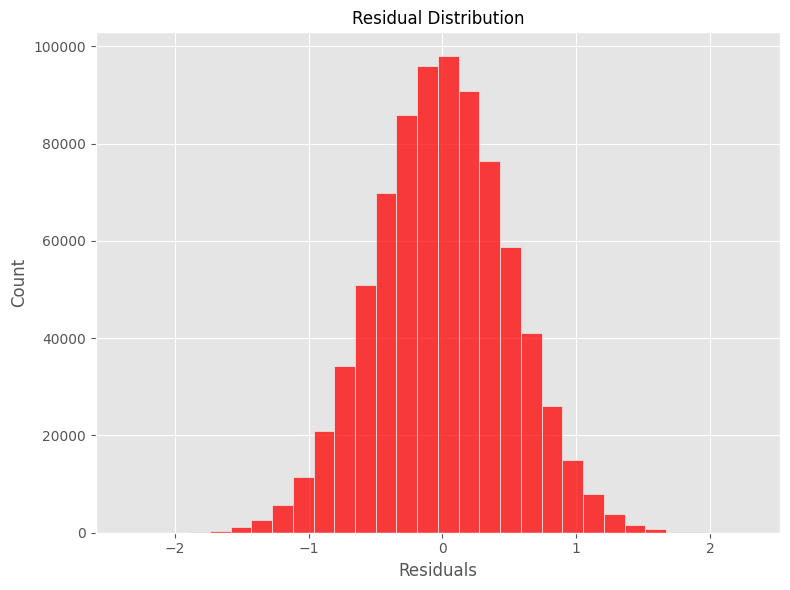

In [ ]:
# Calculating model errors (residuals)
resid = pd.DataFrame(np.transpose([y_train - lr_mdl.predict(X_train)]), columns=["Training Error"])

# Plot model errors
plt.subplots(1,1, figsize=(8, 6))
plt.style.use("ggplot")

sns.histplot(data=resid, x="Training Error", color="red", bins=30)

plt.xlabel("Residuals")
plt.ylabel("Count")
plt.title("Residual Distribution", fontdict={"fontsize": 12, "fontweight": "light"})
plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats

# Extracting coefficients and intercept
coefficients = np.append([lr_mdl.named_steps['lr'].intercept_], lr_mdl.named_steps['lr'].coef_)
coefficient_names = ['Intercept'] + X_train.columns.to_list()

# Calculating standard errors and other statistics
n_rows, n_cols = X_train.shape
X_with_intercept = np.append(np.ones((n_rows, 1)), X_train, axis=1)
var_b = test_mse * np.linalg.inv(np.dot(X_with_intercept.T, X_with_intercept)).diagonal()
standard_errors = np.sqrt(var_b)
t_values = coefficients / standard_errors
p_values = [2 * (1 - stats.t.cdf(np.abs(i), (len(X_with_intercept) - 1))) for i in t_values]

# Creating a DataFrame for display
summary_df = pd.DataFrame({'Coefficient': coefficients,
                           'Standard Error': standard_errors,
                           't-value': t_values,
                           'p-value': p_values},
                          index=coefficient_names)

# Print the DataFrame
print(summary_df)

                     Coefficient  Standard Error       t-value   p-value
Intercept               3.173829        0.037452     84.744783  0.000000
weather_condition       1.297638        0.000685   1893.819808  0.000000
crop_type               0.143732        0.000327    438.947297  0.000000
irrigation_used         0.000518        0.001119      0.463224  0.643204
days_to_harvest        -0.000093        0.000022     -4.318792  0.000016
rainfall_mm            -0.000597        0.000002   -276.982289  0.000000
temperature_celsius    -1.198624        0.000077 -15469.568541  0.000000
crop_yield_success      1.328368        0.037317     35.596410  0.000000
fertilizer_used         1.498800        0.001119   1339.527954  0.000000
region                  0.000324        0.000500      0.647370  0.517393
soil_type              -0.000698        0.000327     -2.132797  0.032942


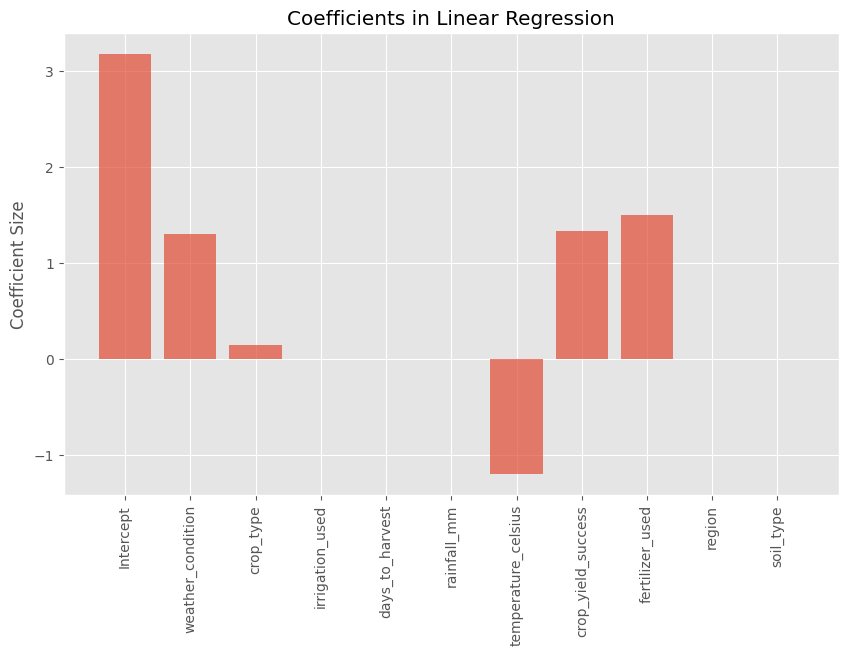

In [ ]:
# Plotting the feature importances
plt.figure(figsize=(10, 6))
y_pos = np.arange(len(coefficient_names))
plt.bar(y_pos, coefficients, align='center', alpha=0.7)
plt.xticks(y_pos, coefficient_names, rotation=90)
plt.ylabel('Coefficient Size')
plt.title('Coefficients in Linear Regression')

plt.show()

**Note:** Try to go learn about interpreting the model information provided above.